# LOAD DATA


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


In [6]:
tr = pd.read_csv("train.csv")


In [7]:
tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [8]:
tr.shape

(891, 12)

In [9]:
tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
tr.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
tr['Age'].head(7)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


In [14]:
older_passengers=tr[tr['Age']>=40]

In [15]:
older_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


In [16]:
pclass1_passengers=tr[tr['Pclass']==1]
pclass1_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [17]:
tr.groupby('Pclass')['Survived'].mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# cleaning

In [18]:
tr["Age"]=tr["Age"].fillna(tr["Age"].mean())

In [19]:
tr['Embarked']=tr['Embarked'].fillna(tr['Embarked'].mode()[0])

In [20]:
tr.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [21]:
tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


# visulization

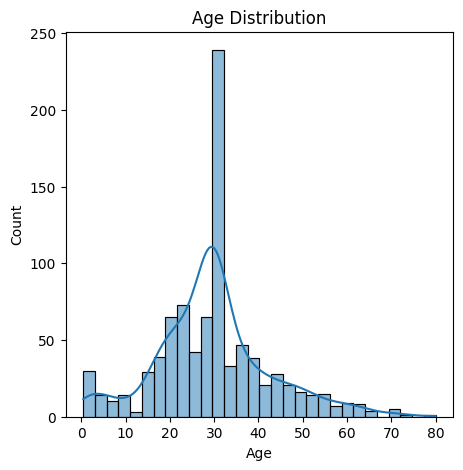

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(tr['Age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

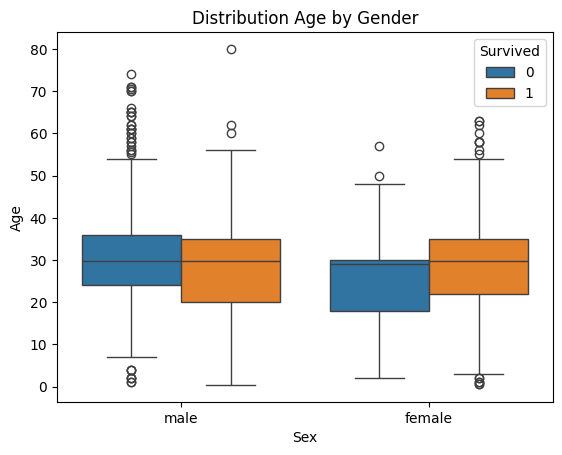

In [25]:
sns.boxplot(x='Sex',y='Age',hue='Survived',data=tr)
plt.title("Distribution Age by Gender")
plt.show()

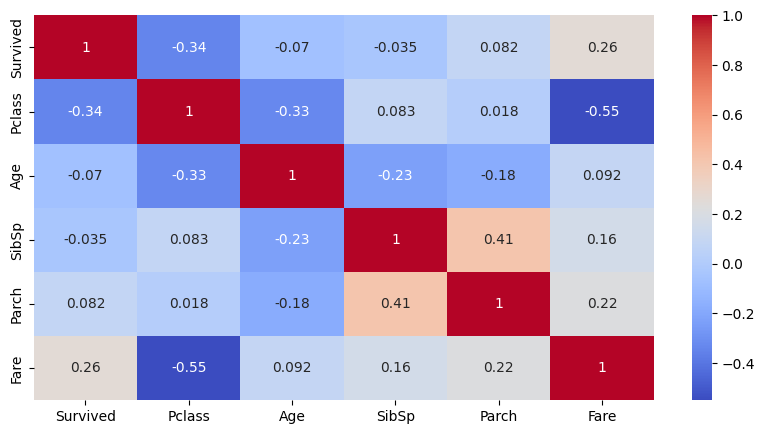

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(tr.drop(['Name','Embarked','Sex','PassengerId'],axis=1).corr(),annot=True,cmap='coolwarm')
plt.show()



# Prediction
#

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
features=['Pclass','Sex','Age','Fare']
tr['Sex']=tr['Sex'].map({'male':1,'female':0})

In [31]:
tr['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
x=tr[features]
y=tr['Survived']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [34]:
y_test

,Survived
83,0
63,0
539,1
134,0
669,1
...,...
845,0
259,1
549,1
716,1


In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8435754189944135

In [39]:
new=pd.DataFrame([[3,1,27,8.6625]],columns=features)

In [40]:
model.predict(new)

array([0])

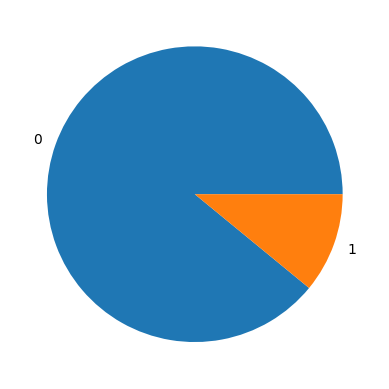

In [43]:

proba = model.predict_proba(new)[0]

plt.pie(proba, labels=[0,1])
plt.show()

In [42]:
proba_all = model.predict_proba(x_test)

print(proba_all)

[[0.5158488  0.4841512 ]
 [0.81216752 0.18783248]
 [0.07474437 0.92525563]
 [0.7337321  0.2662679 ]
 [0.09068268 0.90931732]
 [0.88516729 0.11483271]
 [0.15385001 0.84614999]
 [0.910221   0.089779  ]
 [0.27893676 0.72106324]
 [0.49502732 0.50497268]
 [0.91243549 0.08756451]
 [0.89445983 0.10554017]
 [0.44090621 0.55909379]
 [0.36252781 0.63747219]
 [0.77616731 0.22383269]
 [0.86091884 0.13908116]
 [0.15049301 0.84950699]
 [0.26298113 0.73701887]
 [0.88516895 0.11483105]
 [0.50205717 0.49794283]
 [0.72283395 0.27716605]
 [0.88376341 0.11623659]
 [0.7443023  0.2556977 ]
 [0.78836773 0.21163227]
 [0.33350102 0.66649898]
 [0.90795448 0.09204552]
 [0.7584359  0.2415641 ]
 [0.10572815 0.89427185]
 [0.43940347 0.56059653]
 [0.14856142 0.85143858]
 [0.8976226  0.1023774 ]
 [0.89761824 0.10238176]
 [0.85896127 0.14103873]
 [0.87654956 0.12345044]
 [0.68467227 0.31532773]
 [0.07261969 0.92738031]
 [0.87652476 0.12347524]
 [0.89265349 0.10734651]
 [0.89762887 0.10237113]
 [0.72295319 0.27704681]


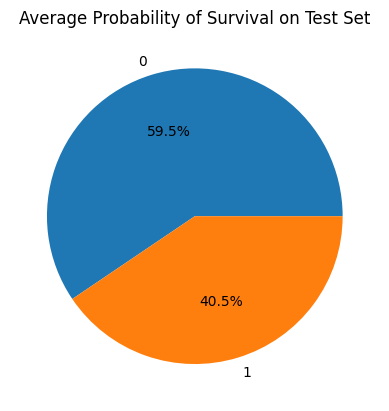

In [48]:
proba_all = model.predict_proba(x_test)

average_proba = proba_all.mean(axis=0)

plt.pie(average_proba, labels=[0, 1], autopct='%1.1f%%')
plt.title("Average Probability of Survival on Test Set")
plt.show()

Accuracy: 0.8435754189944135
Percentage of Correct Predictions: 84.36%
Confusion Matrix:
 [[97 12]
 [16 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       109
           1       0.82      0.77      0.79        70

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



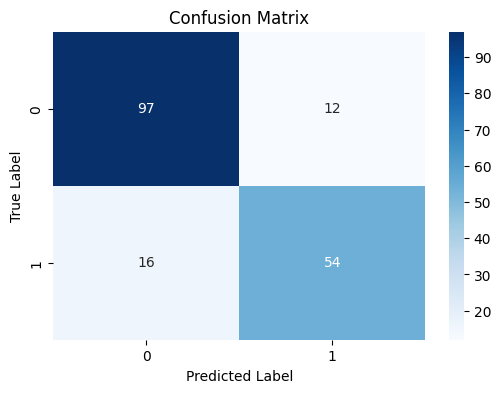

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Percentage of Correct Predictions: {:.2f}%".format(accuracy * 100))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()